<a href="https://colab.research.google.com/github/charith3903/EC7212-Computer-Vision-and-Image-Processing_Take_home_01/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install opencv-python matplotlib

Saving 889f9396-2fce-4535-9920-c3f72ecb192a.png to 889f9396-2fce-4535-9920-c3f72ecb192a (1).png


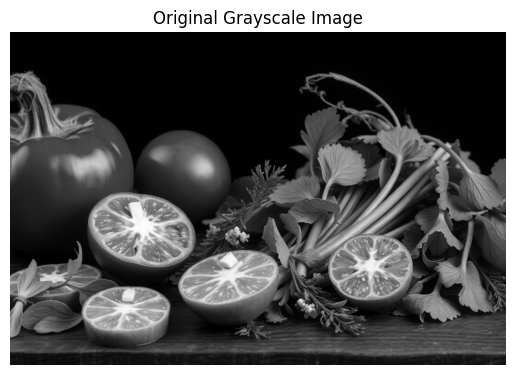

Saved: blurred_3x3.png
Saved: blurred_10x10.png
Saved: blurred_20x20.png


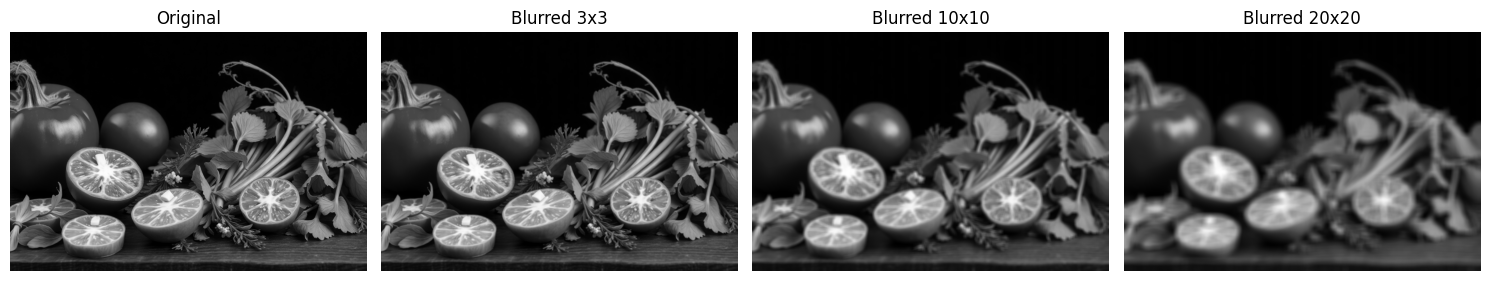

In [30]:

from google.colab import files
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Upload
uploaded = files.upload()

# Load (color)
for filename in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[filename]))
    img = img.convert('RGB')  # Ensure RGB
    img_array = np.array(img)
    break

gray_img = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

# Show original
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


def spatial_average_filter(image, kernel_sizes):
    """
    Applies spatial average filter with different kernel sizes.
    """
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for i, kernel_size in enumerate(kernel_sizes):
        # Apply blur (normalized box filter)
        img_blurred = cv2.blur(image, kernel_size)

        # Show result
        plt.subplot(1, len(kernel_sizes) + 1, i + 2)
        plt.imshow(img_blurred, cmap='gray')
        plt.title(f'Blurred {kernel_size[0]}x{kernel_size[1]}')
        plt.axis('off')

        # Save result
        output_filename = f"blurred_{kernel_size[0]}x{kernel_size[1]}.png"
        cv2.imwrite(output_filename, img_blurred)
        print(f"Saved: {output_filename}")

    plt.tight_layout()
    plt.show()

kernel_sizes = [(3, 3), (10, 10), (20, 20)]
spatial_average_filter(gray_img, kernel_sizes)
